# Final Project

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
voicedata=pd.read_csv('voice.csv')
voicedata.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
voicedata.label = [1 if each == "female" else 0 for each in voicedata.label]
voicedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

In [4]:
voicedata.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,1
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,1
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,1
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,1
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,1


# Visualizing the correlation among the features

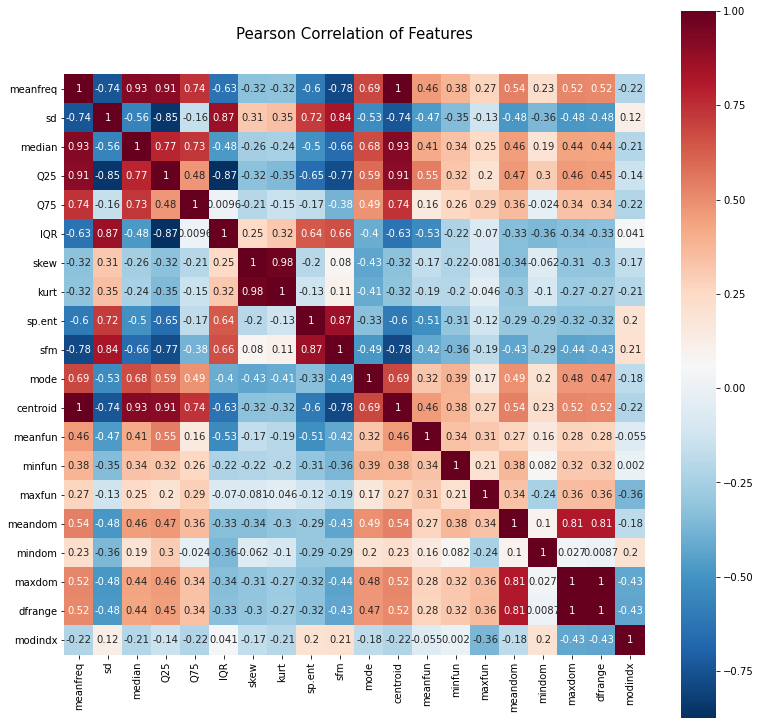

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

colormap = plt.cm.viridis
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(voicedata.iloc[:,:-1].astype(float).corr(),vmax=1.0, square=True,cmap="RdBu_r",annot=True)

## Data Standardisation

In [6]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
x = voicedata.iloc[:, :-1]
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
y = voicedata.iloc[:,-1]

In [7]:
#separating features and labels
#x = voicedata.iloc[:, :-1]
#x = (x - np.min(x)) / (np.max(x)-np.min(x))
#print(x[:10])
#y = voicedata.iloc[:,-1]

## Splitting dataset into training set and testing set for better generalisation

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 0)
#test_size=0.2 means %20 test datas, %80 train datas
names_all = []
scores_all = []

# KNN

Max accuracy at K = 5
Max accuracy is 0.9779179810725552


Text(0, 0.5, 'score')

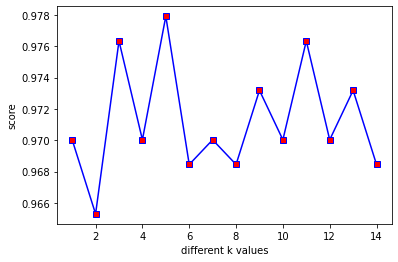

In [9]:
from sklearn.neighbors import KNeighborsClassifier
score_list=[]
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test))

maxAccuracy = score_list.index(max(score_list))

print('Max accuracy at K = '+str(maxAccuracy+1))
print('Max accuracy is ' + str(score_list[maxAccuracy]))
plt.plot(range(1,15),score_list,color='blue', marker='s',markerfacecolor='red')
plt.xlabel("different k values")
plt.ylabel("score")


In [10]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(x_train,y_train)
print("Accuracy for K = 5 is {}".format(knn_5.score(x_test,y_test)))

Accuracy for K = 5 is 0.9779179810725552


In [48]:
names_all.append("KNN")
scores_all.append(knn_5.score(x_test,y_test))

# Support Vector Machine

## Default Linear kernel

In [13]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
print("SVM Score is: {}".format(svm_linear.score(x_test,y_test)))

SVM Score is: 0.973186119873817


## CV on Linear kernel

In [14]:
from sklearn.model_selection import cross_val_score
svm_linear=SVC(kernel='linear')
scores_linear = cross_val_score(svm_linear, x, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores_linear)

[0.91167192 0.97160883 0.97160883 0.97791798 0.95899054 0.9873817
 0.99369085 0.97791798 0.95253165 0.99367089]


In [15]:
print(scores_linear.mean())

0.9696991175178692


In [16]:
method_names = []
method_scores = []
method_names.append("Linear")
method_scores.append(scores_linear.mean())

## Default RBF kernel

In [17]:
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(x_train,y_train)
print("svm_rbf Score is: {}".format(svm_rbf.score(x_test,y_test)))

svm_rbf Score is: 0.9842271293375394


## CV on rbf kernel

In [18]:
svc_rbf=SVC(kernel='rbf')
scores_rbf = cross_val_score(svc_rbf, x, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores_rbf)

[0.93375394 0.95583596 0.96845426 0.96214511 0.96529968 0.99684543
 0.99053628 0.98422713 0.91455696 0.99367089]


In [19]:
print(scores_rbf.mean())

0.9665325639899376


In [20]:
method_names.append("rbf")
method_scores.append(scores_rbf.mean())

## Default Polynomial kernel

In [21]:
svm_ploy=SVC(kernel='poly')
svm_ploy.fit(x_train,y_train)
print("svm_rbf Score is: {}".format(svm_ploy.score(x_test,y_test)))

svm_rbf Score is: 0.9589905362776026


## CV on Polynomial kernel

In [22]:
svc_ploy=SVC(kernel='poly')
scores_ploy = cross_val_score(svc_ploy, x, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores_ploy)

[0.89274448 0.94952681 0.93059937 0.92744479 0.94952681 0.99369085
 0.98422713 0.96529968 0.87974684 0.9778481 ]


In [23]:
print(scores_ploy.mean())

0.9450654873617378


In [24]:
method_names.append("Polynomial")
method_scores.append(scores_ploy.mean())

## Compare three kernels' score

Text(0, 0.5, 'Method Score')

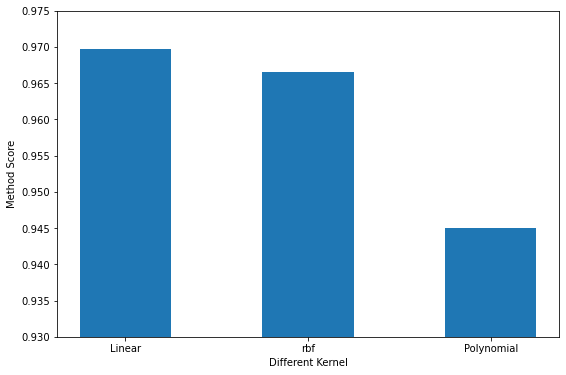

In [25]:
plt.figure(figsize=(9,6))
plt.ylim([0.93,0.975])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Different Kernel')
plt.ylabel('Method Score')

## RBF SVM parameters

In [27]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=10)
grid.fit(x, y)
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range)) 

In [28]:
print("The best parameters are %s with a score of %0.4f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 100000.0, 'gamma': 1e-06} with a score of 0.9703


## Visualization
Draw heatmap of the validation accuracy as a function of gamma and C

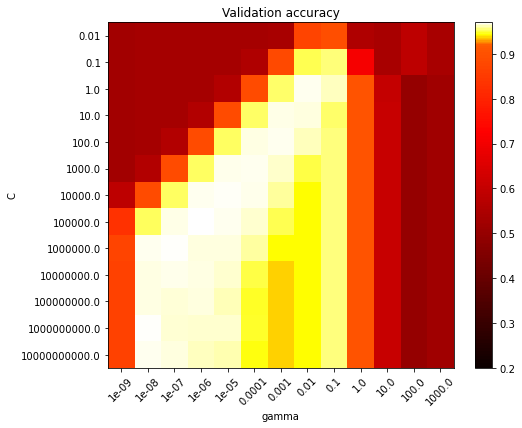

In [29]:
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [30]:
svc_gamma=SVC(kernel='rbf',C=10000,gamma=1e-06)
svc_gamma.fit(x_train,y_train)
print("svm_rbf Score is: {}".format(svc_gamma.score(x_test,y_test)))

svm_rbf Score is: 0.9668769716088328


In [31]:
svc_gamma=SVC(kernel='rbf',C=10000,gamma=1e-06)
svm_rbf.fit(x_train,y_train)
scores_gamma = cross_val_score(svc_gamma, x, y, cv=10, scoring='accuracy')
print(scores_gamma)
print(scores_gamma.mean())

[0.89905363 0.96529968 0.97476341 0.97791798 0.95899054 0.99053628
 0.99369085 0.98107256 0.9556962  0.99050633]
0.9687527452781216


In [49]:
names_all.append("SVM")
scores_all.append(scores_gamma.mean())

# Neural Network

In [36]:
from sklearn import neural_network
score_list = []
hidden_layer=range(1,20)
for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        score_list.append(model.score(x_test,y_test))
kloc = score_list.index(max(score_list))
print("Max accuracy is %s occurs at H = %s." % (score_list[kloc], hidden_layer[kloc]))

Max accuracy is 0.9842271293375394 occurs at H = 9.


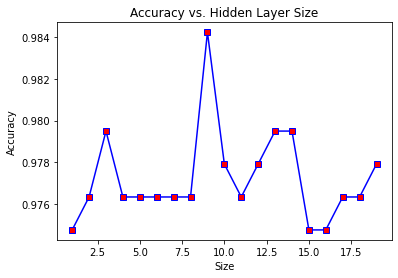

In [37]:
plt.plot(hidden_layer, score_list, color='blue', marker='s',markerfacecolor='red')
plt.title('Accuracy vs. Hidden Layer Size')
plt.xlabel('Size')
plt.ylabel('Accuracy')
plt.show()

In [50]:
names_all.append("Neural Network")
scores_all.append(score_list[kloc])

# CONCLUSION

Text(0, 0.5, 'Method Score')

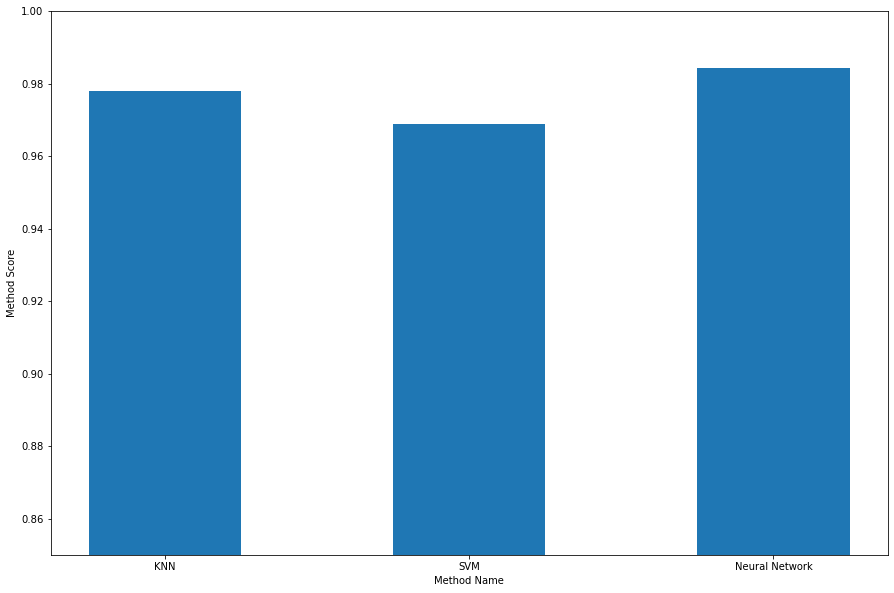

In [51]:
plt.figure(figsize=(15,10))
plt.ylim([0.85,1])
plt.bar(names_all,scores_all,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')